In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv(r'C:\ML\mlproject\notebook\data\stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [17]:
print("Categories in gender : ",df['gender'].unique())
print("Categories in race_ethnicity : ",df['race_ethnicity'].unique())
print("Categories in parental_level_of_education : ",df['parental_level_of_education'].unique())
print("Categories in lunch : ",df['lunch'].unique())
print("Categories in test_preparation_course : ",df['test_preparation_course'].unique())

Categories in gender :  ['female' 'male']
Categories in race_ethnicity :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch :  ['standard' 'free/reduced']
Categories in test_preparation_course :  ['none' 'completed']


In [21]:
numerical=[num for num in df.columns if df[num].dtype!='O']
categorical=[alp for alp in df.columns if df[alp].dtype=='O']
print(f"We have {len(numerical)} numerical features they are {numerical}")
print(f"We have {len(categorical)} numerical features they are {categorical}")

We have 3 numerical features they are ['math_score', 'reading_score', 'writing_score']
We have 5 numerical features they are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [23]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['avg_score']=df['total_score']/len(numerical)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
math_full=df[df['math_score']==100]['avg_score'].count()
writing_full=df[df['writing_score']==100]['avg_score'].count()
reading_full=df[df['reading_score']==100]['avg_score'].count()
print(f"no of students full marks in Maths : {math_full}")
print(f"no of students full marks in writing: {writing_full}")
print(f"no of students full marks in reading : {reading_full}")

no of students full marks in Maths : gender                         7
race_ethnicity                 7
parental_level_of_education    7
lunch                          7
test_preparation_course        7
math_score                     7
reading_score                  7
writing_score                  7
total_score                    7
avg_score                      7
dtype: int64
no of students full marks in writing: 14
no of students full marks in reading : 17


In [41]:
math_less=df[df['math_score']<=20]['avg_score'].count()
writing_less=df[df['writing_score']<=20]['avg_score'].count()
reading_less=df[df['reading_score']<=20]['avg_score'].count()
print(f"no of students took less than 20 marks in Maths : {math_less}")
print(f"no of students took less than 20 marks in writing: {writing_less}")
print(f"no of students took less than 20 marks in reading : {reading_less}")

no of students took less than 20 marks in Maths : 4
no of students took less than 20 marks in writing: 3
no of students took less than 20 marks in reading : 1


<Axes: xlabel='avg_score', ylabel='Count'>

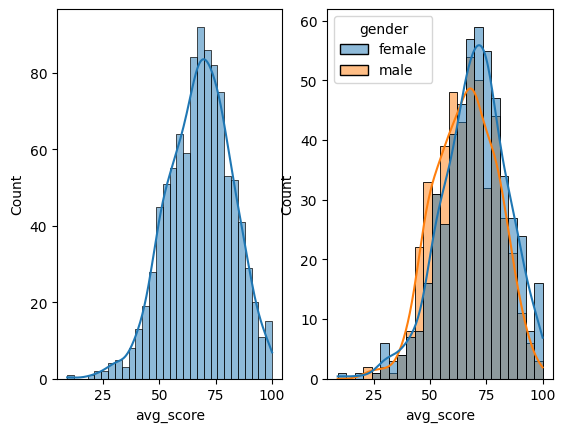

In [67]:
plt.subplot(121)
sns.histplot(data=df,x='avg_score',bins=30,kde=True)
plt.subplot(122)
sns.histplot(data=df,x='avg_score',kde=True,hue='gender')

<Axes: xlabel='total_score', ylabel='Count'>

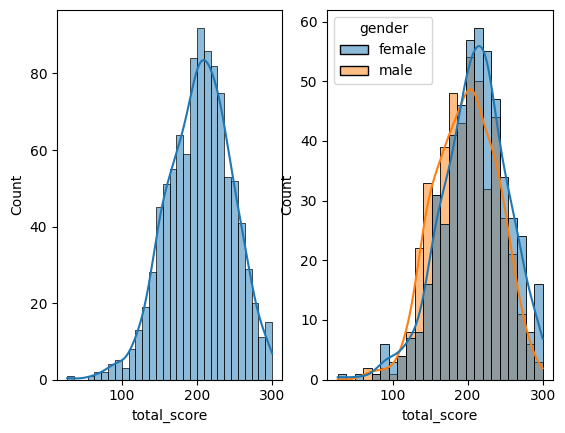

In [68]:
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True)
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')